In [1]:
!pip install missingno

In [2]:
!pip install tensorflow

# Proyecto 2 Data Mining y Machine Learning
Prof. Iván Carrera
Estudiante. Jorge Ricardo Teran Sosa
30 de julio de 2023

El presente proyecto tiene como objetivo predecir la contaminación del aire en Beijing, China, utilizando el conjunto de datos "Beijing Multi-Site Air-Quality Data Data Set", disponible en este [link](http://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data)

Hace unos años, China estableció el Índice de Calidad del Aire (AQI) basado en el nivel de cinco contaminantes atmosféricos, a saber, dióxido de azufre (SO2), dióxido de nitrógeno (NO2), partículas suspendidas (PM10), monóxido de carbono (CO) y ozono (O3) medidos en las estaciones de monitoreo de cada ciudad. A cada nivel de contaminante se le asigna una puntuación individual, y el AQI final es la puntuación más alta de esos cinco contaminantes. Los contaminantes pueden medirse de manera bastante diferente. SO2, NO2 y PM10 se miden como un promedio diario. CO y O3 son más dañinos y se miden como un promedio por hora. El valor final del AQI se calcula por día y tiene la interpretación que se muestra en la siguiente tabla.

|  **AQI**  | **Air Pollution Level** |
|:---------:|:-----------------------:|
|   0 - 50  |        Excellent        |
|  51 - 100 |           Good          |
| 101 - 150 |    Slightly Polluted    |
| 151 - 200 |     Lightly Polluted    |
| 201 - 250 |   Moderately Polluted   |
| 251 - 300 |     Heavily Polluted    |
|    300+   |    Severely Polluted    |

## Importación de datos, limpieza y preprocesamiento

In [3]:
import pandas as pd
import glob
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [4]:
# df = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df = pd.read_csv('archivo_combinado.csv', sep=';')
df

C:\Users\rikar\AppData\Local\Temp\ipykernel_23640\714438838.py:2: DtypeWarning: Columns (7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archivo_combinado.csv', sep=';')


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  object 
 8   NO2      408652 non-null  object 
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  object 
 11  TEMP     420370 non-null  object 
 12  PRES     420375 non-null  object 
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(6), int64(5), object(7)
memory usage: 57.8+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,420768.0,17532.500000,10122.116943,1.0,8766.75,17532.5,26298.25,35064.0
year,420768.0,2014.662560,1.177198,2013.0,2014.00,2015.0,2016.00,2017.0
month,420768.0,6.522930,3.448707,1.0,4.00,7.0,10.00,12.0
day,420768.0,15.729637,8.800102,1.0,8.00,16.0,23.00,31.0
hour,420768.0,11.500000,6.922195,0.0,5.75,11.5,17.25,23.0
PM2.5,412029.0,79.793428,80.822391,2.0,20.00,55.0,111.00,999.0
PM10,414319.0,104.602618,91.772426,2.0,36.00,82.0,145.00,999.0
CO,400067.0,1230.766454,1160.182716,100.0,500.00,900.0,1500.00,10000.0
DEWP,420365.0,2.490822,13.793847,-43.4,-8.90,3.1,15.10,29.1
RAIN,420378.0,0.064476,0.821004,0.0,0.00,0.0,0.00,72.5


Tenemos columnas con valores flotantes identificadas como object, para lo cual vamos convertirlas en valores flotantes.

In [7]:
df['SO2'] = pd.to_numeric(df['SO2'], errors='coerce').astype(float)
df['NO2'] = pd.to_numeric(df['NO2'], errors='coerce').astype(float)
df['O3'] = pd.to_numeric(df['O3'], errors='coerce').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411713 non-null  float64
 8   NO2      407865 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       406527 non-null  float64
 11  TEMP     420370 non-null  object 
 12  PRES     420375 non-null  object 
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(9), int64(5), object(4)
memory usage: 57.8+ MB


Revisamos si tenemos valores nulos

In [8]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9055
NO2        12903
CO         20701
O3         14241
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Notamos que existen valores nulos, para los cuales tendremos que hacer imputación de datos alrrededor de la media.

<AxesSubplot:>

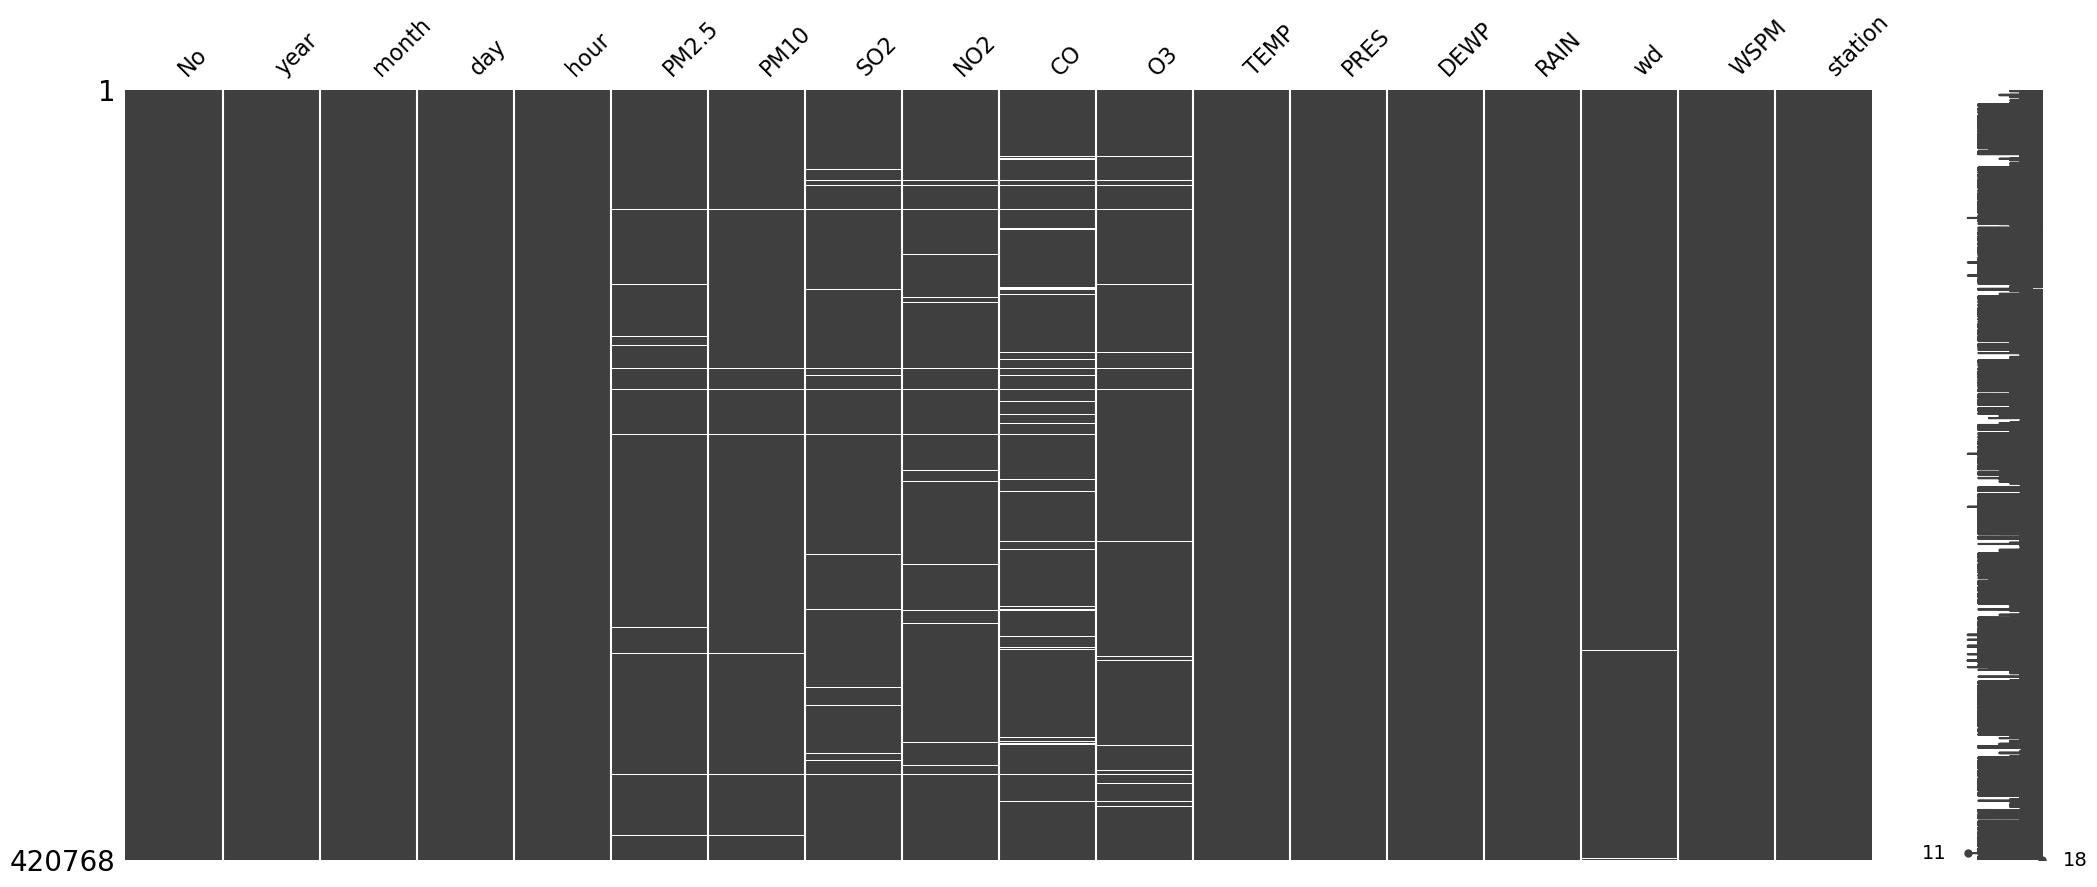

In [9]:
msno.matrix(df)

Los datos que con mas nulos son los de la columna CO y esta perdida es de forma aleatoria, sin embargo hay columnas que siguen un patron con respecto a la perdida podriamos pensar que se trata de una falta de datos justo en esa fila.
Para completar estos valores nulos, no ayudaremos de una tecnica de imputacion de datos que consiste llenar estos valores con la media de valores que existen en la columna.
Esto lo haremos utilizando la libreria SimpleImputer, que se encarga de tomar la media de valores y completar los nulos.

In [10]:
imputer = SimpleImputer()
df['PM2.5'] = imputer.fit_transform(df[['PM2.5']])
df['PM10'] = imputer.fit_transform(df[['PM10']])
df['SO2'] = imputer.fit_transform(df[['SO2']])
df['NO2'] = imputer.fit_transform(df[['NO2']])
df['CO'] = imputer.fit_transform(df[['CO']])
df['O3'] = imputer.fit_transform(df[['O3']])

<AxesSubplot:>

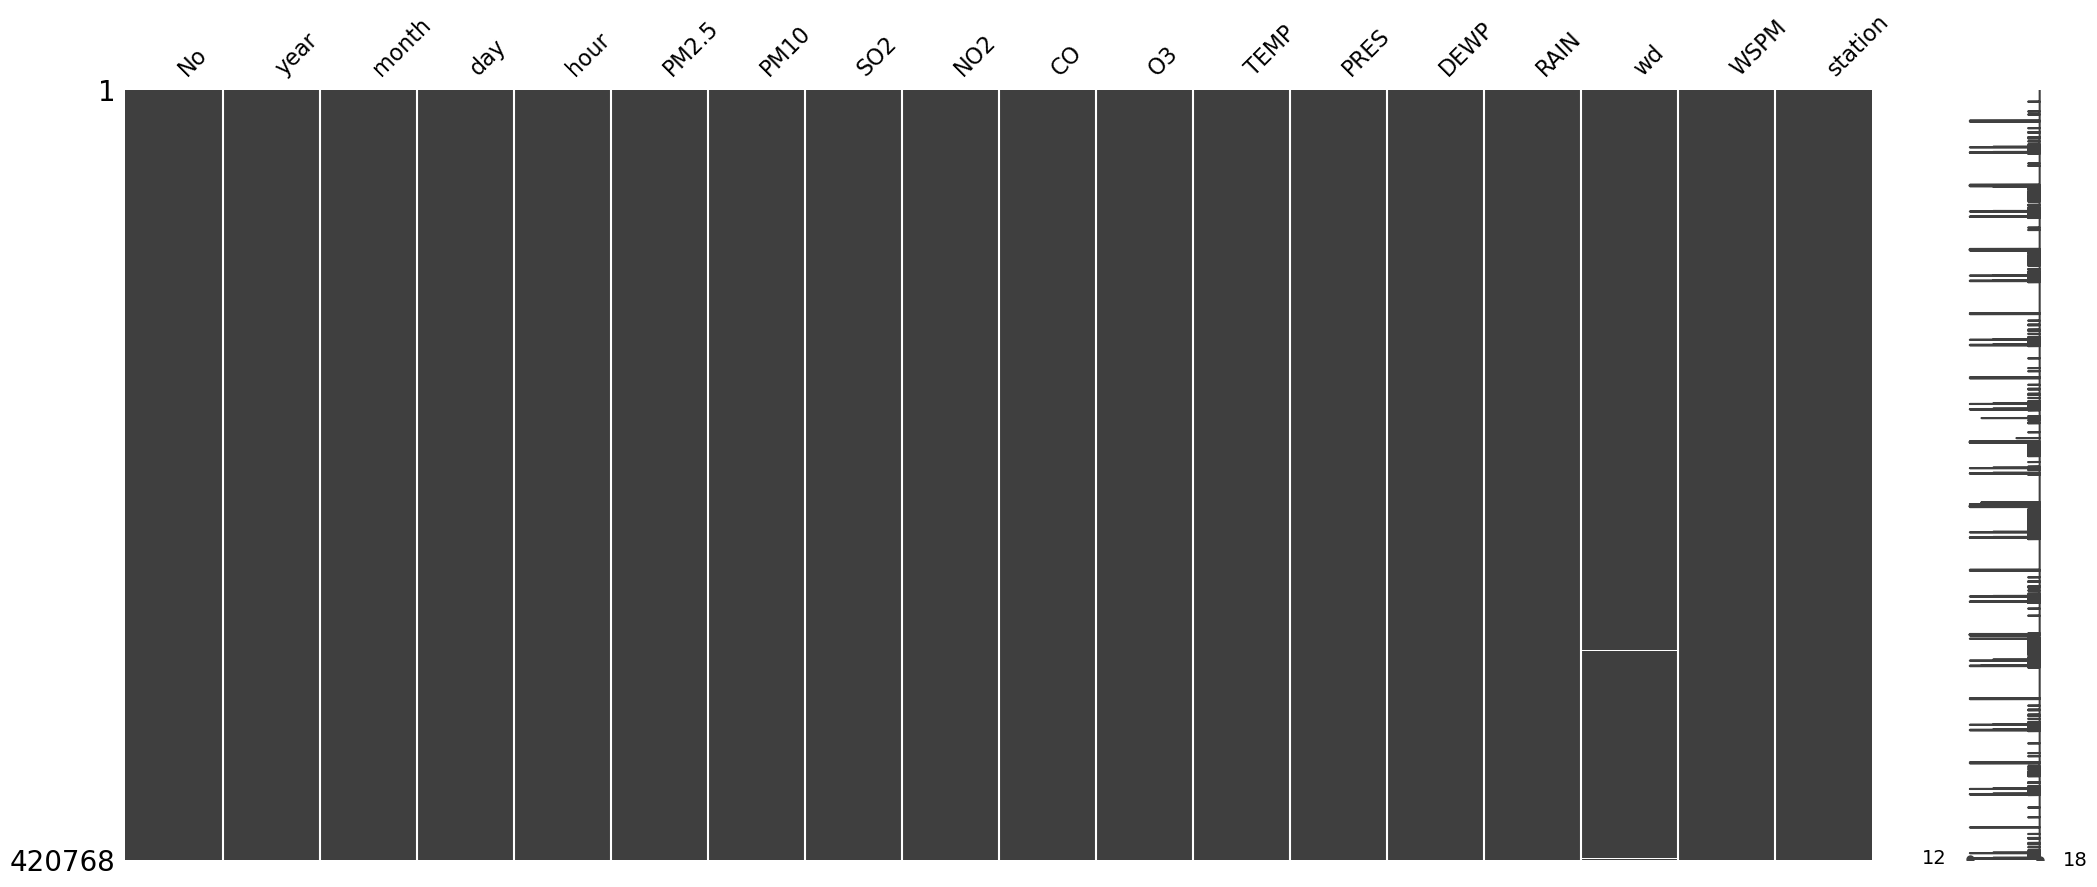

In [11]:
msno.matrix(df)

Como podemos observar los valores se han llenado correctamente y ya no tenemos más valores nulos, sin embargo podemos ver una pequeña linea en los ultimos valores de nuestro dataframe, para esto no haremos uso de la tecnica de imputacion dado que estos ultimos valores no los usaremos para entrenar nuestro modelo. Para lo cula quitaremos de nuestro dataframe y crearemos uno nuevo que sirva exclusivamente para el entrenamiento.

### Columnas de interes
Vamos a empezar a quitar las columnas que no influyen en nuestro modelo, tales como No, TEMP, PRES, DEWP, RAIN, wd, WSPM, station. Puesto que la entrada para nuestro modelo será una fecha la cual el modelo interpretará y nos dará la predeccion de cuanto es el AQI en esa fecha.

In [12]:
df = df.drop(['No', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'], axis=1)
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0
...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,420768.0,2014.662560,1.177198,2013.0000,2014.00,2015.0,2016.00,2017.000
month,420768.0,6.522930,3.448707,1.0000,4.00,7.0,10.00,12.000
day,420768.0,15.729637,8.800102,1.0000,8.00,16.0,23.00,31.000
hour,420768.0,11.500000,6.922195,0.0000,5.75,11.5,17.25,23.000
PM2.5,420768.0,79.793428,79.978679,2.0000,21.00,57.0,109.00,999.000
PM10,420768.0,104.602618,91.066422,2.0000,36.00,84.0,144.00,999.000
SO2,420768.0,17.527782,30.188309,0.2856,3.00,8.0,20.00,996.744
NO2,420768.0,59.008601,75.123858,2.0000,24.00,46.0,72.00,999.811
CO,420768.0,1230.766454,1131.283304,100.0000,500.00,900.0,1500.00,10000.000
O3,420768.0,64.296006,79.565962,0.2142,12.00,49.0,83.00,1071.000


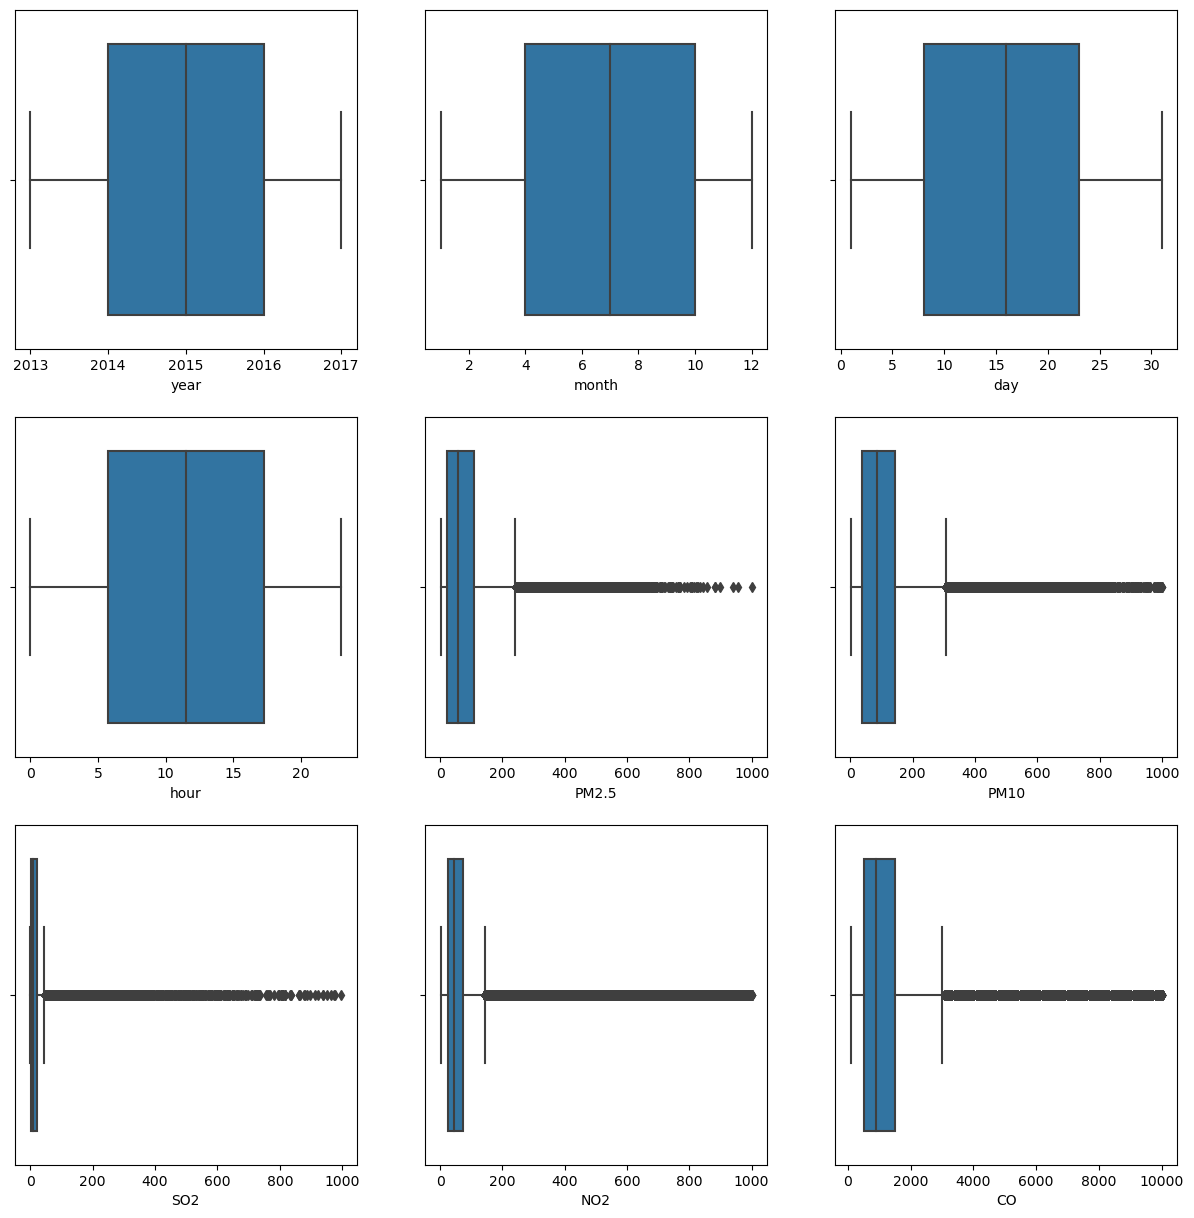

In [14]:
plt.figure(figsize=(15, 15))
c = df.columns[:-1]
for i in enumerate(c):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1], data=df)

Notamos valores atipicos en las columnas que se separan demaciado de la media, Estos resultados no ayudarán para el entrenamiento del modelo neuronal, para lo cual procedemos a balancear un poco con respecto a sus extremos.

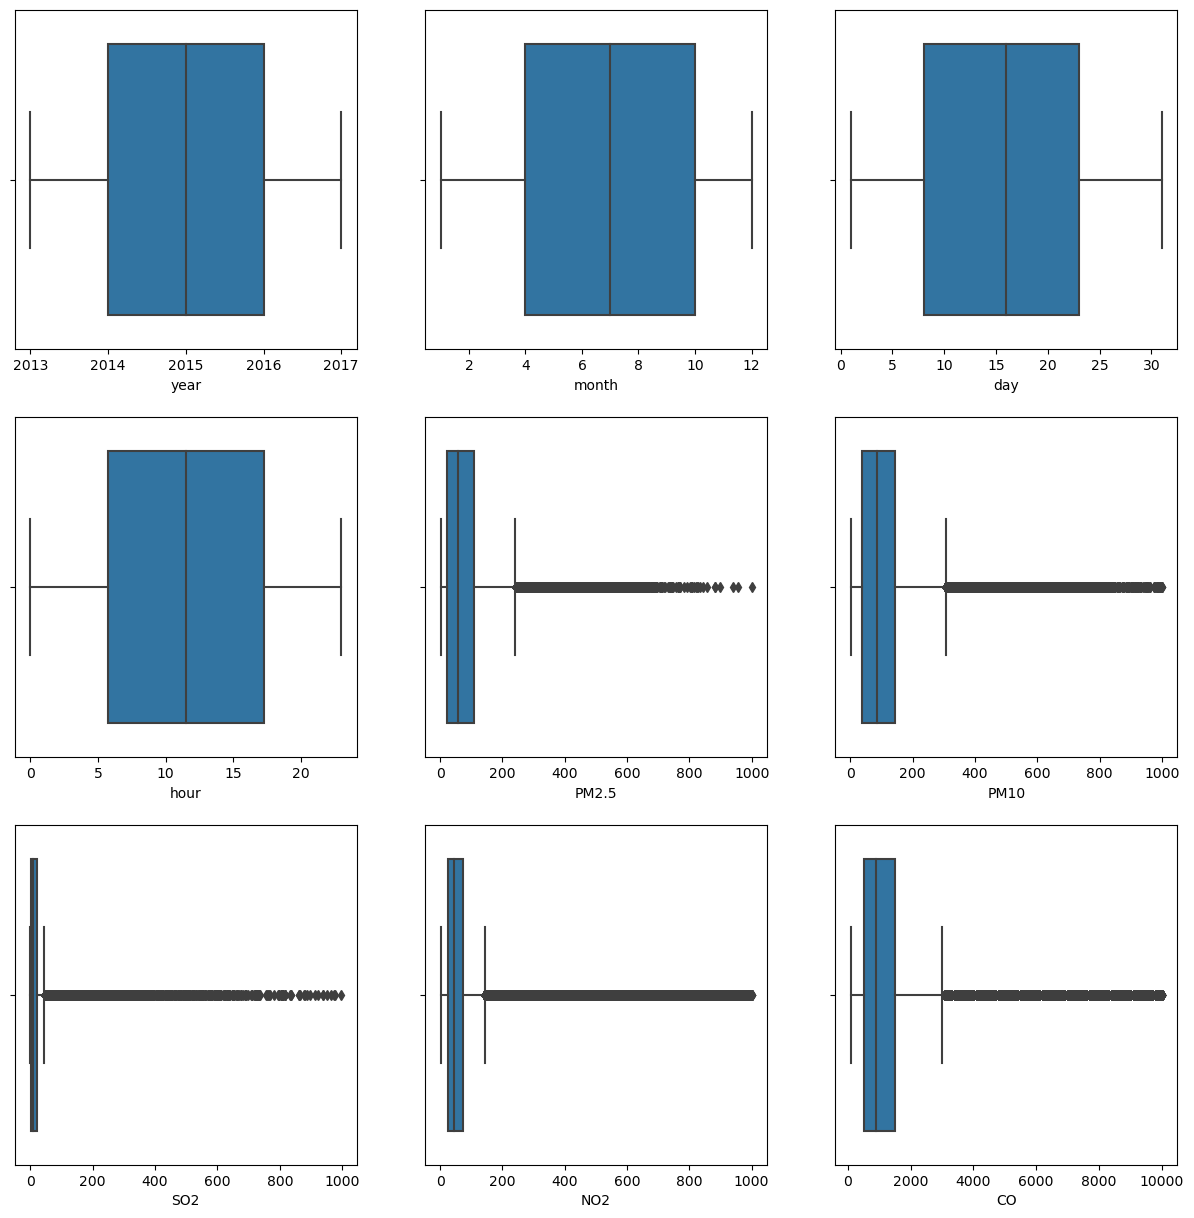

In [15]:
plt.figure(figsize=(15, 15))
c = df.columns[:-1]
for i in enumerate(c):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1], data=df)

Tenemos las columnas como SO2 con varios valores atipicos, los cuales pudimos ajustar un poco.

In [16]:
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0


## Calculo del AQI
Para el calculo del AQI tomaremos los valores de 5 contaminantes los cuales son: SO2, NO2, PM10, CO, O3 todos estos tienen una puntuación individual, el AQI al final es la puntuacíon más alta de estos cinco contaminantes. Para los contaminantes SO2, NO2, y PM10 se miden como un promedio diario, mientras que CO y O3 son más dañinos se miden como un promedio por hora. Dado que nuestra tabla está dada en terminos de horas estos ultimos contaminantes no serán un problema, para lo cual haremos un promedio por dia de todos los contaminantes así nos desaremos de la tabla horas y tendremos el promedio por dia, para despues tomar el más alto de estos el cual será el valor del AQI.

<AxesSubplot:>

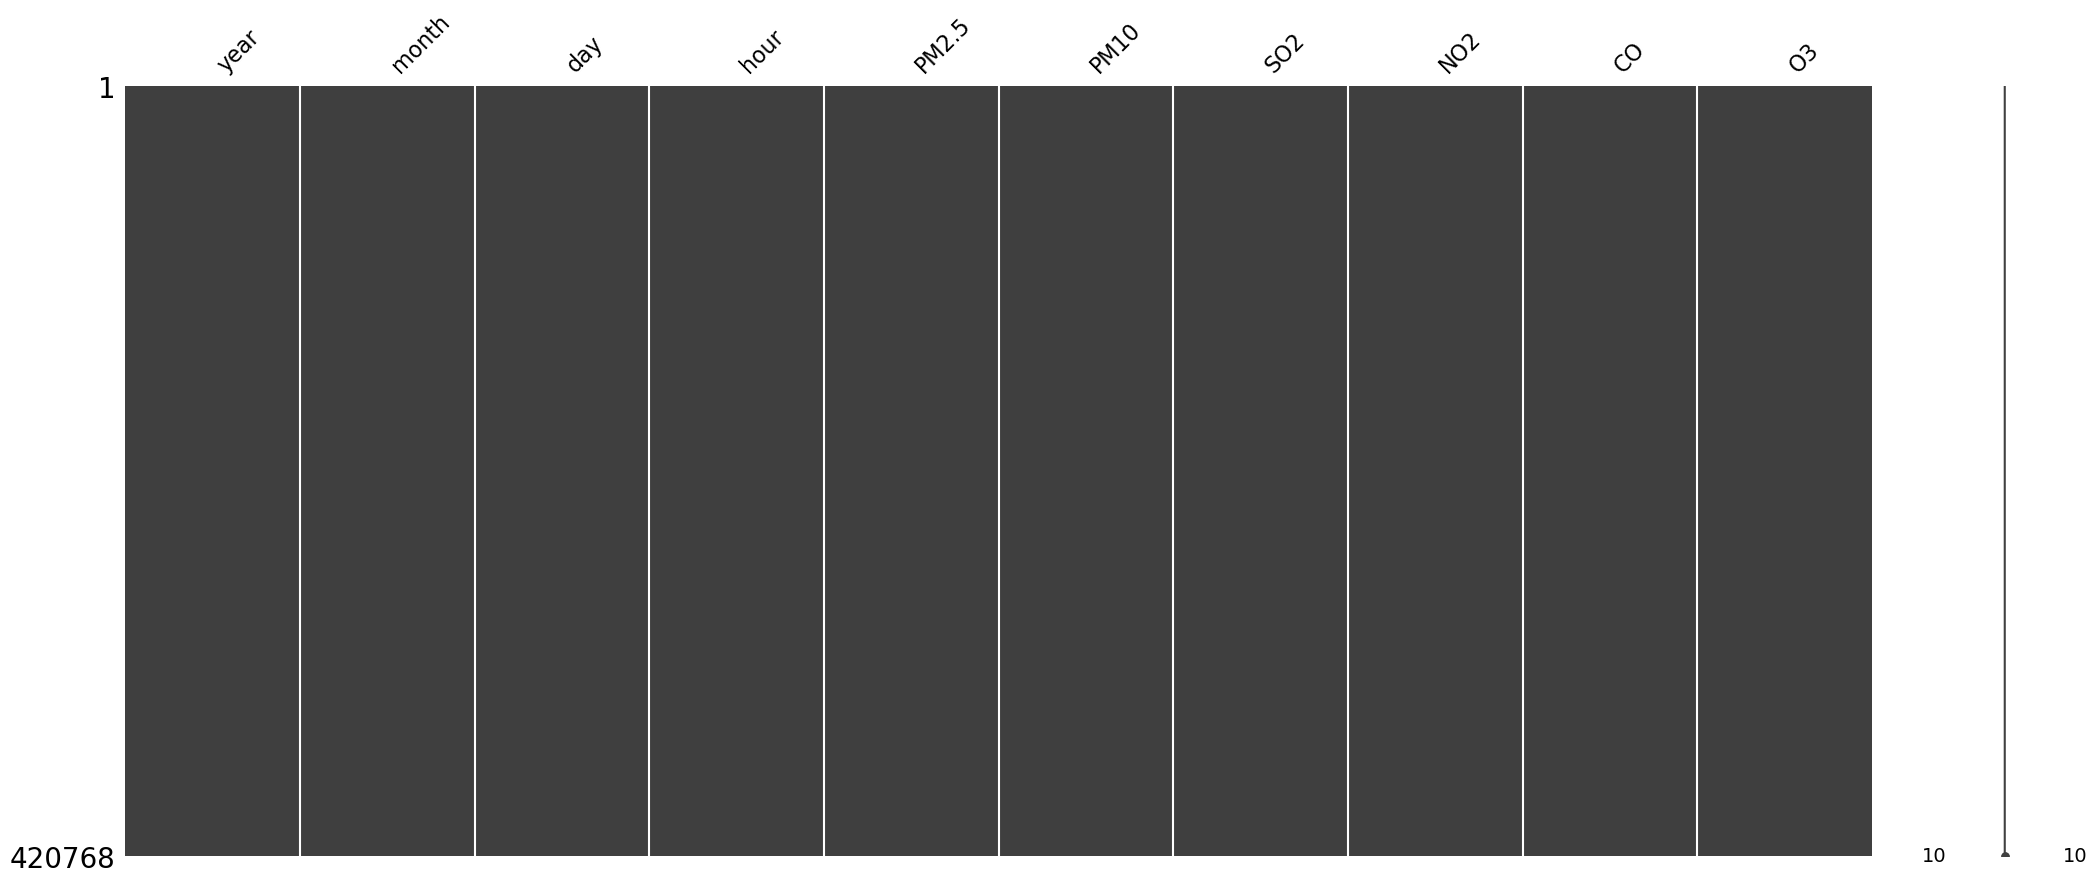

In [17]:
msno.matrix(df)

Ahora tenemos los promedios diarios de todos los contaminantes, solo falta calcular el AQI siendo este el valor más alto de todos.

In [18]:
df = df.drop(['hour'], axis=1)

In [19]:
df['AQI'] = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].max(axis=1)
df

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,AQI
0,2013,3,1,4.0,4.0,4.0,7.0,300.0,77.0,300.0
1,2013,3,1,8.0,8.0,4.0,7.0,300.0,77.0,300.0
2,2013,3,1,7.0,7.0,5.0,10.0,300.0,73.0,300.0
3,2013,3,1,6.0,6.0,11.0,11.0,300.0,72.0,300.0
4,2013,3,1,3.0,3.0,12.0,12.0,300.0,72.0,300.0
...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,11.0,32.0,3.0,24.0,400.0,72.0,400.0
420764,2017,2,28,13.0,32.0,3.0,41.0,500.0,50.0,500.0
420765,2017,2,28,14.0,28.0,4.0,38.0,500.0,54.0,500.0
420766,2017,2,28,12.0,23.0,4.0,30.0,400.0,59.0,400.0


<AxesSubplot:>

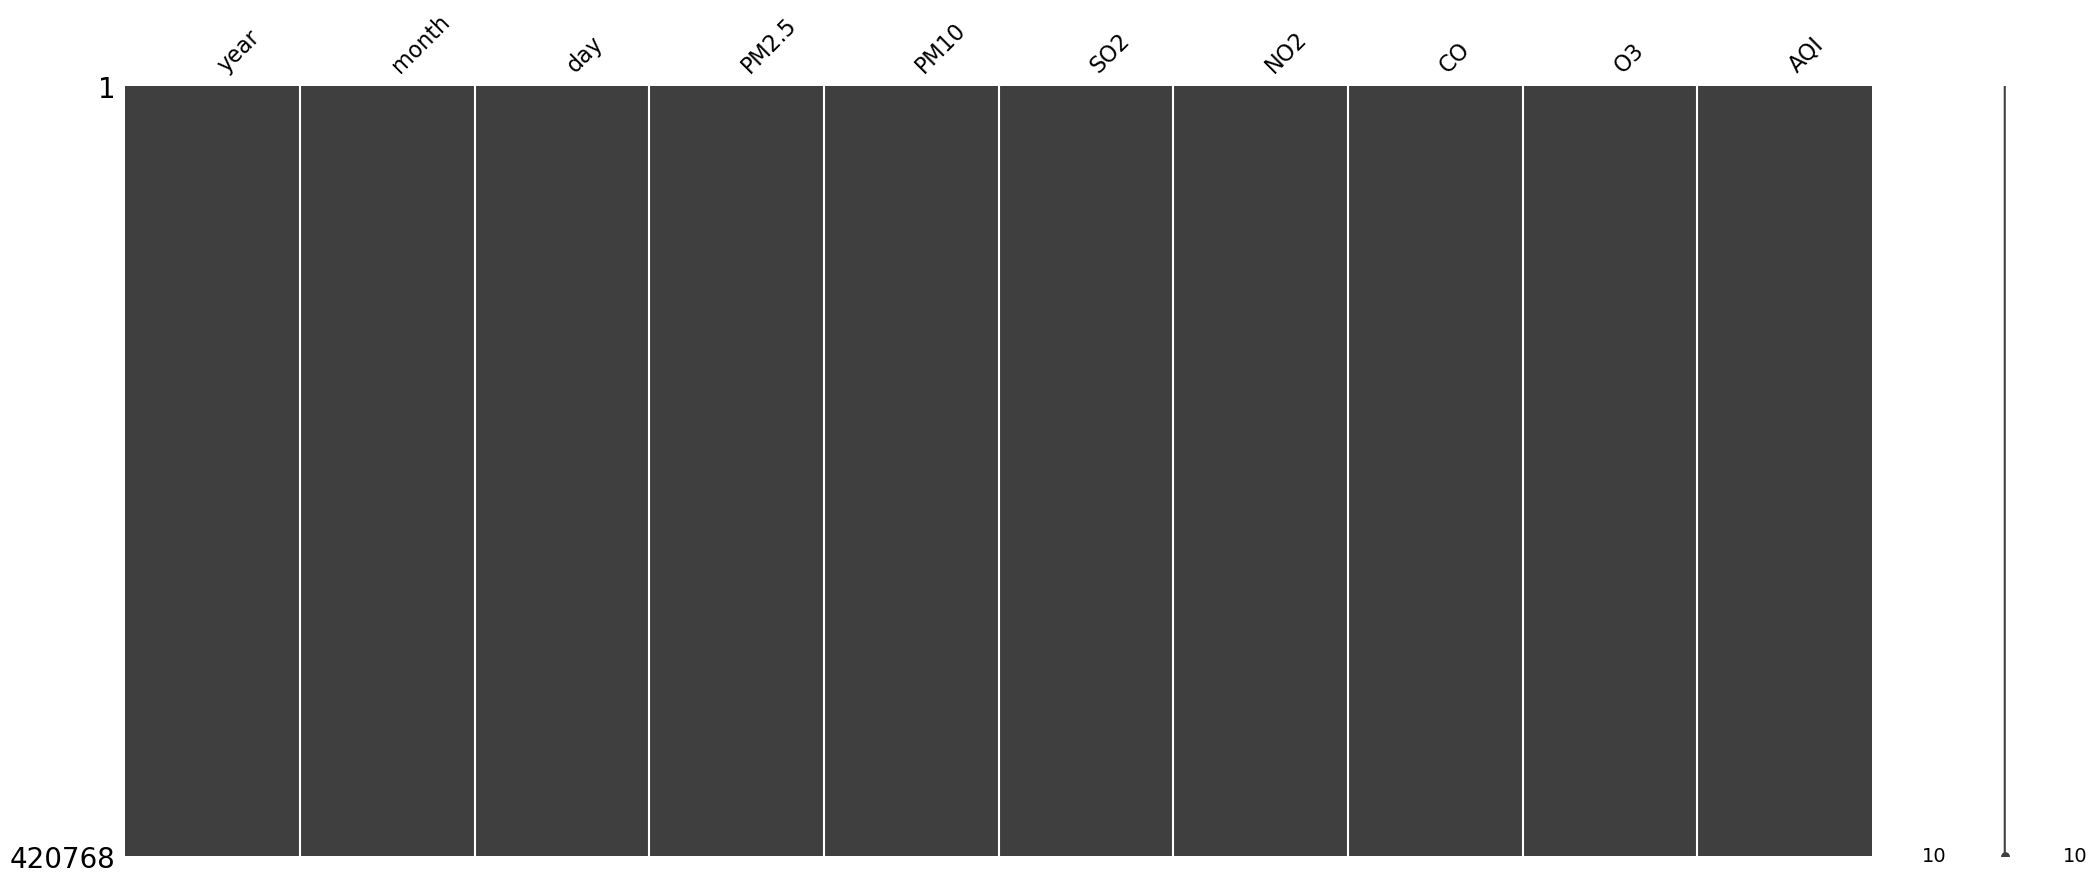

In [20]:
msno.matrix(df)

In [21]:
rangos = [ 0, 50, 100, 150, 200, 250, 300, float('inf')]
etiquetas = [ 'Excellent', 'Good', 'Slightly Polluted', 'Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted', 'Severely Polluted']
df['Air Pollution Level'] = pd.cut(df['AQI'], bins=rangos, labels=etiquetas)
df

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,AQI,Air Pollution Level
0,2013,3,1,4.0,4.0,4.0,7.0,300.0,77.0,300.0,Heavily Polluted
1,2013,3,1,8.0,8.0,4.0,7.0,300.0,77.0,300.0,Heavily Polluted
2,2013,3,1,7.0,7.0,5.0,10.0,300.0,73.0,300.0,Heavily Polluted
3,2013,3,1,6.0,6.0,11.0,11.0,300.0,72.0,300.0,Heavily Polluted
4,2013,3,1,3.0,3.0,12.0,12.0,300.0,72.0,300.0,Heavily Polluted
...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,11.0,32.0,3.0,24.0,400.0,72.0,400.0,Severely Polluted
420764,2017,2,28,13.0,32.0,3.0,41.0,500.0,50.0,500.0,Severely Polluted
420765,2017,2,28,14.0,28.0,4.0,38.0,500.0,54.0,500.0,Severely Polluted
420766,2017,2,28,12.0,23.0,4.0,30.0,400.0,59.0,400.0,Severely Polluted


In [22]:
df.isnull().sum()

year                   0
month                  0
day                    0
PM2.5                  0
PM10                   0
SO2                    0
NO2                    0
CO                     0
O3                     0
AQI                    0
Air Pollution Level    0
dtype: int64

In [23]:
le = LabelEncoder()
df['Air Pollution Level'] = le.fit_transform(df['Air Pollution Level'])
df

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,AQI,Air Pollution Level
0,2013,3,1,4.0,4.0,4.0,7.0,300.0,77.0,300.0,1
1,2013,3,1,8.0,8.0,4.0,7.0,300.0,77.0,300.0,1
2,2013,3,1,7.0,7.0,5.0,10.0,300.0,73.0,300.0,1
3,2013,3,1,6.0,6.0,11.0,11.0,300.0,72.0,300.0,1
4,2013,3,1,3.0,3.0,12.0,12.0,300.0,72.0,300.0,1
...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,11.0,32.0,3.0,24.0,400.0,72.0,400.0,4
420764,2017,2,28,13.0,32.0,3.0,41.0,500.0,50.0,500.0,4
420765,2017,2,28,14.0,28.0,4.0,38.0,500.0,54.0,500.0,4
420766,2017,2,28,12.0,23.0,4.0,30.0,400.0,59.0,400.0,4


Notamos que los valores nulos ya no están, y podemos continuar con el analisis exploratorio de datos.

# Análisis exploratorio de datos

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 420768 non-null  int64  
 1   month                420768 non-null  int64  
 2   day                  420768 non-null  int64  
 3   PM2.5                420768 non-null  float64
 4   PM10                 420768 non-null  float64
 5   SO2                  420768 non-null  float64
 6   NO2                  420768 non-null  float64
 7   CO                   420768 non-null  float64
 8   O3                   420768 non-null  float64
 9   AQI                  420768 non-null  float64
 10  Air Pollution Level  420768 non-null  int32  
dtypes: float64(7), int32(1), int64(3)
memory usage: 33.7 MB


In [25]:
df.describe()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,AQI,Air Pollution Level
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2014.662560,6.522930,15.729637,79.793428,104.602618,17.527782,59.008601,1230.766454,64.296006,1232.502545,3.651732
std,1.177198,3.448707,8.800102,79.978679,91.066422,30.188309,75.123858,1131.283304,79.565962,1130.075378,0.941752
min,2013.000000,1.000000,1.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,100.000000,0.000000
25%,2014.000000,4.000000,8.000000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,500.000000,4.000000
50%,2015.000000,7.000000,16.000000,57.000000,84.000000,8.000000,46.000000,900.000000,49.000000,900.000000,4.000000
75%,2016.000000,10.000000,23.000000,109.000000,144.000000,20.000000,72.000000,1500.000000,83.000000,1500.000000,4.000000
max,2017.000000,12.000000,31.000000,999.000000,999.000000,996.744000,999.811000,10000.000000,1071.000000,10000.000000,5.000000


Despues de describir como se comporta la data, y con respecto a la variable AQI, podemos ver que esta su valor minimo se encuentra en 100 lo cual no está cerca de ser de ser el indice de excelente. Por lo demas podemos ver que que AQI está tomando directamente el valor de la columna CO, lo cual no creo que sea lo mejor, debido a que las otras variables que están en juego tambien tienen comprotamientos que deberian influenciar en esta. Si esto no pasa, puede ser que no se hizo una buena valoración de los datos.
Vamos a ver como se comportan los demas datos con respecto a la variable AQI.

C:\Users\rikar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

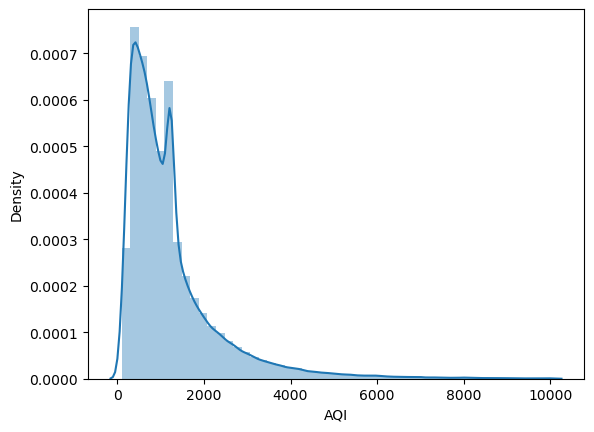

In [26]:
sns.distplot(df['AQI'])

Notamos que su su dencidad de datos está enter 0 y 2000 por lo que es demasiado grande para los limites de contaminacion que se tienen.

# Modelo Predictivo
Para entrenar el modelo haremos uso de una funcion de activacion lineal

In [33]:
df_copy = df.drop('Air Pollution Level', axis = 1)
df_copy

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,AQI
0,2013,3,1,4.0,4.0,4.0,7.0,300.0,77.0,300.0
1,2013,3,1,8.0,8.0,4.0,7.0,300.0,77.0,300.0
2,2013,3,1,7.0,7.0,5.0,10.0,300.0,73.0,300.0
3,2013,3,1,6.0,6.0,11.0,11.0,300.0,72.0,300.0
4,2013,3,1,3.0,3.0,12.0,12.0,300.0,72.0,300.0
...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,11.0,32.0,3.0,24.0,400.0,72.0,400.0
420764,2017,2,28,13.0,32.0,3.0,41.0,500.0,50.0,500.0
420765,2017,2,28,14.0,28.0,4.0,38.0,500.0,54.0,500.0
420766,2017,2,28,12.0,23.0,4.0,30.0,400.0,59.0,400.0


In [34]:
X = df_copy.drop('AQI', axis=1)
y = df_copy['AQI']

In [35]:
X = MinMaxScaler().fit(X).transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = Sequential()
model.add(Dense(64, input_shape=(9,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [41]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [42]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
10520/10520 [==============================] - 11s 1ms/step - loss: 174716.3281
Epoch 2/50
10520/10520 [==============================] - 11s 1ms/step - loss: 91.2704
Epoch 3/50
10520/10520 [==============================] - 11s 1ms/step - loss: 63.3400
Epoch 4/50
10520/10520 [==============================] - 11s 1ms/step - loss: 51.5397
Epoch 5/50
10520/10520 [==============================] - 12s 1ms/step - loss: 44.2631
Epoch 6/50
10520/10520 [==============================] - 12s 1ms/step - loss: 38.3508
Epoch 7/50
10520/10520 [==============================] - 12s 1ms/step - loss: 34.0108
Epoch 8/50
10520/10520 [==============================] - 13s 1ms/step - loss: 30.8569
Epoch 9/50
10520/10520 [==============================] - 12s 1ms/step - loss: 27.9793
Epoch 10/50
10520/10520 [==============================] - 12s 1ms/step - loss: 25.8115
Epoch 11/50
10520/10520 [==============================] - 13s 1ms/step - loss: 23.9931
Epoch 12/50
10520/10520 [============

In [43]:
loss = model.evaluate(X_test, y_test)
print(f'Pérdida (loss) en el conjunto de prueba: {loss}')

2630/2630 [==============================] - 2s 791us/step - loss: 3.3974
Pérdida (loss) en el conjunto de prueba: 3.3973774909973145


In [44]:
predictions = model.predict(X_test)

2630/2630 [==============================] - 2s 714us/step
